# Analyse exploratoire univariée des données

**Auteur:** Louis Vanacker

**Date:** 5 janvier 2026

**Objectif:** Analyser les variables individuelles (distributions, valeurs aberrantes, tendances).

In [1]:
# Import des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Chargement des données
# URL GitHub pour reproductibilité (fonctionne sur Colab et Jupyter)
url = "https://raw.githubusercontent.com/Dorsumsellae/Programmation-avancee-Projet-d-examen-Students-Performance-in-Exams/main/data/raw/StudentsPerformance.csv"
df = pd.read_csv(url)

# Alternative en local (décommenter si le repo est cloné localement)
# df = pd.read_csv('../data/raw/StudentsPerformance.csv')

print(f'Dimensions du dataset : {df.shape}')

Dimensions du dataset : (1000, 8)


## 1. Analyse des variables catégorielles

In [2]:
# Liste des variables catégorielles
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education',
                    'lunch', 'test preparation course']

print('=== VARIABLES CATÉGORIELLES ===')
for col in categorical_cols:
    print(f'\n{col.upper()}:')
    print(df[col].value_counts())
    print(f'Valeur la plus fréquente : {df[col].mode()[0]} ({df[col].value_counts().iloc[0]} étudiants, {df[col].value_counts().iloc[0]/len(df)*100:.1f}%)')

=== VARIABLES CATÉGORIELLES ===

GENDER:
gender
female    518
male      482
Name: count, dtype: int64
Valeur la plus fréquente : female (518 étudiants, 51.8%)

RACE/ETHNICITY:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
Valeur la plus fréquente : group C (319 étudiants, 31.9%)

PARENTAL LEVEL OF EDUCATION:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
Valeur la plus fréquente : some college (226 étudiants, 22.6%)

LUNCH:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
Valeur la plus fréquente : standard (645 étudiants, 64.5%)

TEST PREPARATION COURSE:
test preparation course
none         642
completed    358
Name: count, dtype: int64
Valeur la plus fréquente : none (642 étudiants, 64.2%)


FileNotFoundError: [Errno 2] No such file or directory: '../reports/categorical_distributions.png'

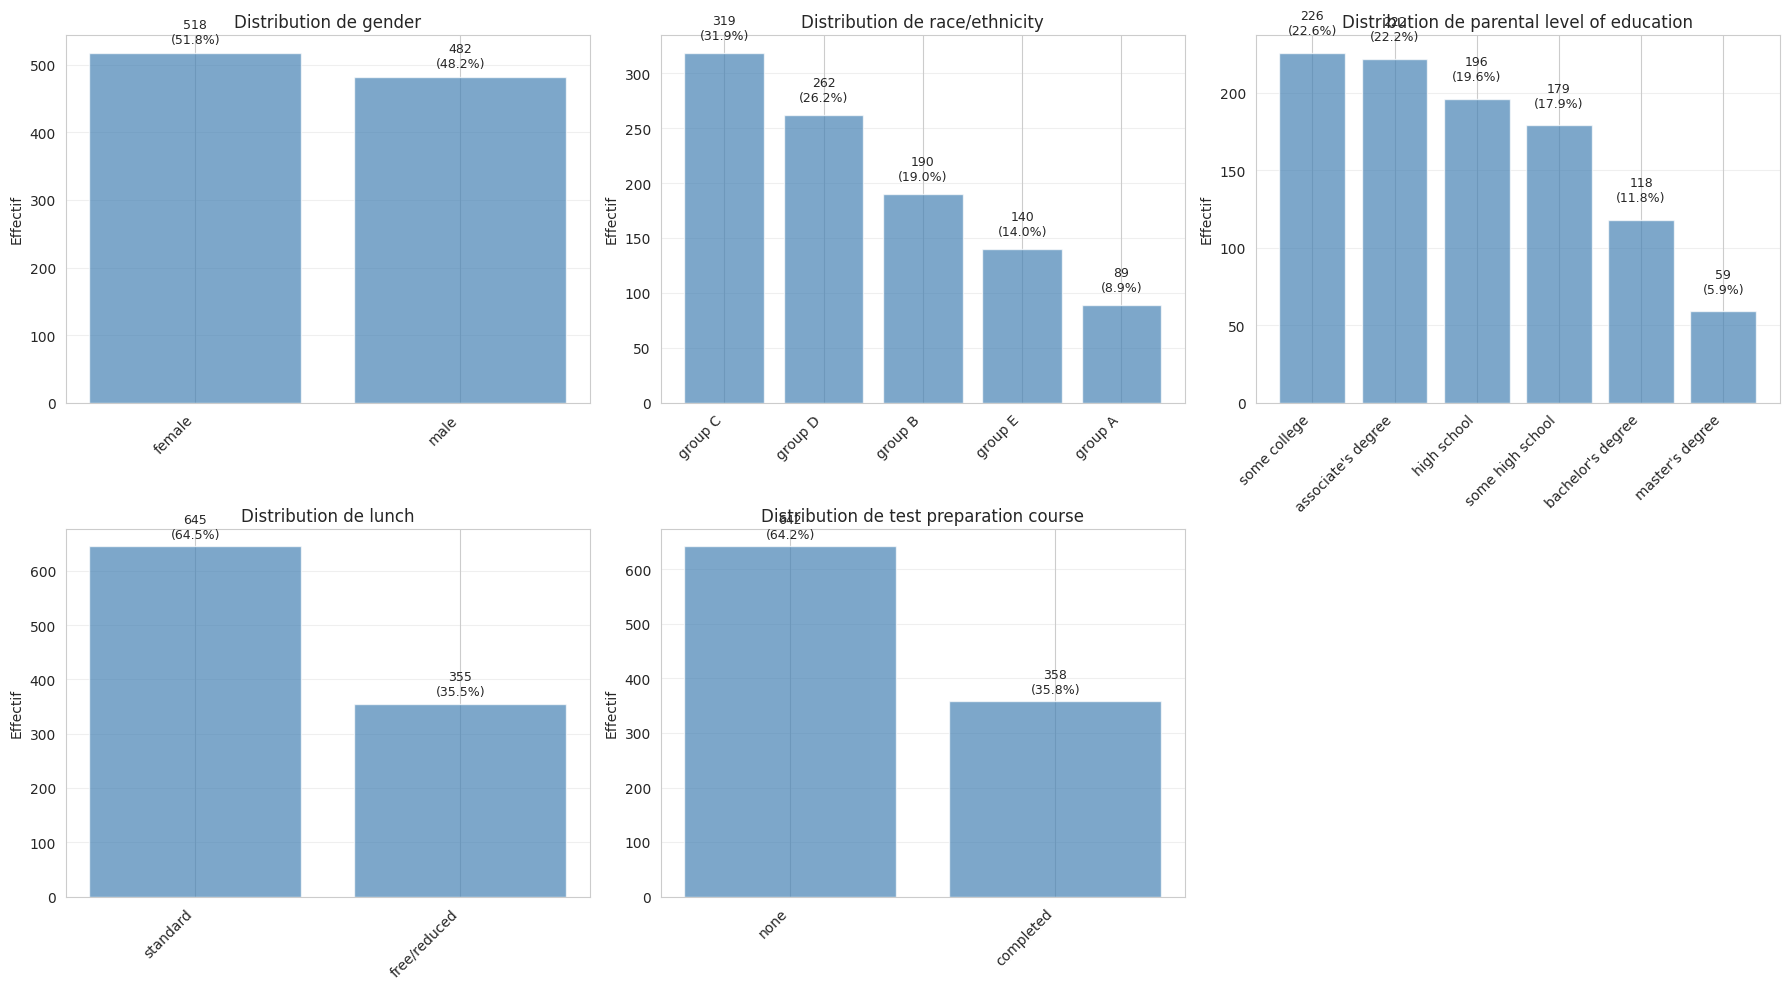

In [3]:
# Visualisation des distributions catégorielles
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = df[col].value_counts()
    axes[i].bar(range(len(counts)), counts.values, color='steelblue', alpha=0.7)
    axes[i].set_xticks(range(len(counts)))
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_ylabel('Effectif')
    axes[i].grid(axis='y', alpha=0.3)

    # Ajout des étiquettes de valeurs
    for j, v in enumerate(counts.values):
        axes[i].text(j, v + 10, f'{v}\n({v/len(df)*100:.1f}%)',
                    ha='center', va='bottom', fontsize=9)

fig.delaxes(axes[5])
plt.tight_layout()
plt.savefig('../reports/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## 2. Analyse des variables numériques (scores)

In [4]:
# Colonnes des scores
score_cols = ['math score', 'reading score', 'writing score']

print('=== STATISTIQUES DES SCORES ===')
print(df[score_cols].describe())

print('\n=== STATISTIQUES DÉTAILLÉES ===')
for col in score_cols:
    print(f'\n{col.upper()}:')
    print(f'  Moyenne : {df[col].mean():.2f}')
    print(f'  Médiane : {df[col].median():.2f}')
    print(f'  Écart-type : {df[col].std():.2f}')
    print(f'  Minimum : {df[col].min()}')
    print(f'  Maximum : {df[col].max()}')
    print(f'  Étendue : {df[col].max() - df[col].min()}')

=== STATISTIQUES DES SCORES ===
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

=== STATISTIQUES DÉTAILLÉES ===

MATH SCORE:
  Moyenne : 66.09
  Médiane : 66.00
  Écart-type : 15.16
  Minimum : 0
  Maximum : 100
  Étendue : 100

READING SCORE:
  Moyenne : 69.17
  Médiane : 70.00
  Écart-type : 14.60
  Minimum : 17
  Maximum : 100
  Étendue : 83

WRITING SCORE:
  Moyenne : 68.05
  Médiane : 69.00
  Écart-type : 15.20
  Minimum : 10
  Maximum : 100
  Étendue : 90


FileNotFoundError: [Errno 2] No such file or directory: '../reports/score_distributions.png'

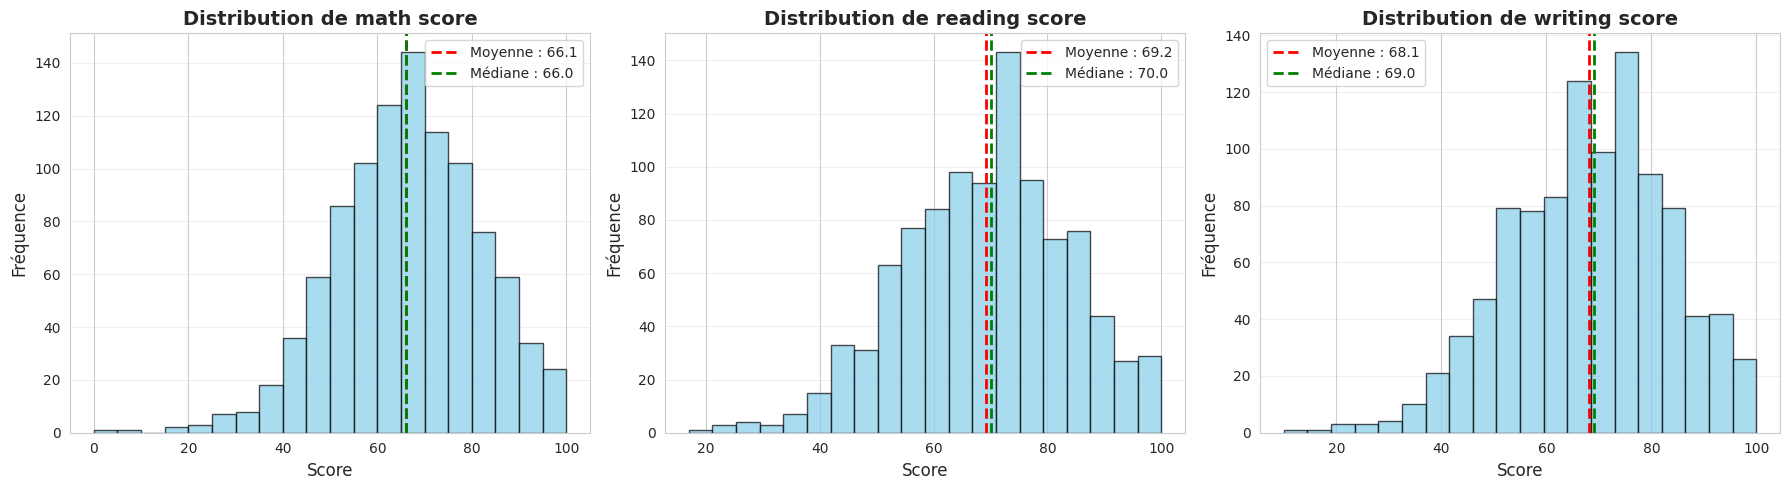

In [5]:
# Distributions des scores avec lignes moyenne/médiane
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(score_cols):
    axes[i].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Moyenne : {df[col].mean():.1f}')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', linewidth=2,
                   label=f'Médiane : {df[col].median():.1f}')
    axes[i].set_title(f'Distribution de {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Score', fontsize=12)
    axes[i].set_ylabel('Fréquence', fontsize=12)
    axes[i].legend(fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/score_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Détection des valeurs aberrantes

FileNotFoundError: [Errno 2] No such file or directory: '../reports/score_boxplots.png'

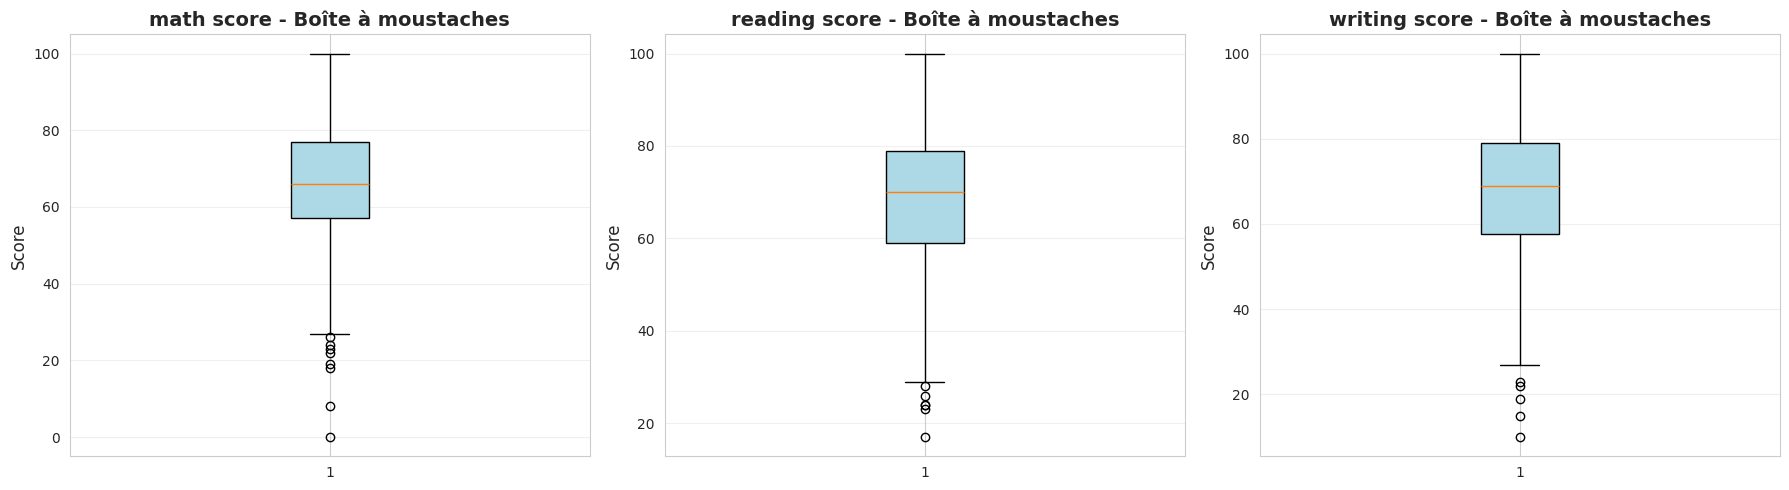

In [6]:
# Boîtes à moustaches pour visualiser les valeurs aberrantes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(score_cols):
    bp = axes[i].boxplot(df[col], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    axes[i].set_title(f'{col} - Boîte à moustaches', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Score', fontsize=12)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/score_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Méthode IQR pour détecter les valeurs aberrantes
print('=== DÉTECTION DES VALEURS ABERRANTES (MÉTHODE IQR) ===')
for col in score_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f'\n{col.upper()}:')
    print(f'  Q1 : {Q1:.2f}')
    print(f'  Q3 : {Q3:.2f}')
    print(f'  IQR : {IQR:.2f}')
    print(f'  Borne inférieure : {lower_bound:.2f}')
    print(f'  Borne supérieure : {upper_bound:.2f}')
    print(f'  Nombre de valeurs aberrantes : {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)')

=== DÉTECTION DES VALEURS ABERRANTES (MÉTHODE IQR) ===

MATH SCORE:
  Q1 : 57.00
  Q3 : 77.00
  IQR : 20.00
  Borne inférieure : 27.00
  Borne supérieure : 107.00
  Nombre de valeurs aberrantes : 8 (0.80%)

READING SCORE:
  Q1 : 59.00
  Q3 : 79.00
  IQR : 20.00
  Borne inférieure : 29.00
  Borne supérieure : 109.00
  Nombre de valeurs aberrantes : 6 (0.60%)

WRITING SCORE:
  Q1 : 57.75
  Q3 : 79.00
  IQR : 21.25
  Borne inférieure : 25.88
  Borne supérieure : 110.88
  Nombre de valeurs aberrantes : 5 (0.50%)


## Résultats clés

### Variables catégorielles
- **Genre** : Distribution quasi équilibrée
- **Origine ethnique** : 5 groupes (A à E) avec représentation variable
- **Niveau d'éducation des parents** : Va de « lycée partiel » à « master »
- **Type de déjeuner** : ~35% reçoivent un déjeuner gratuit/réduit (indicateur socio-économique)
- **Cours de préparation** : ~65% n'ont PAS complété de cours de préparation aux tests

### Variables numériques (scores)
- Les trois scores suivent des **distributions approximativement normales**
- **Scores moyens** : Maths ~66, Lecture ~69, Écriture ~68
- Les scores en mathématiques ont tendance à être **légèrement inférieurs** à ceux en lecture/écriture
- **Peu de valeurs aberrantes** détectées (< 2% pour chaque score)
- Plage complète de 0 à 100 observée
- Aucune valeur manquante ni problème de qualité des données

### Implications pour la modélisation
- Jeu de données propre, prêt pour la modélisation
- Nécessité d'encoder les variables catégorielles
- À considérer : investiguer pourquoi les scores en maths sont plus faibles
- La complétion du cours de préparation pourrait être un prédicteur significatif